In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

In [2]:
df = pd.read_csv('Uber_Drives_Clean.csv')

In [3]:
df.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start Date,Start Time,End Date,End Time,Weekday,Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,4,6.0
1,Business,Fort Pierce,Fort Pierce,5.0,Meeting,2016-01-02,01:25:00,2016-01-02,01:37:00,5,12.0
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,5,13.0
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1,14.0
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,2,67.0


In [4]:
df.describe()

,MILES*,Weekday,Duration
count,850.000000,850.000000,850.000000
mean,10.477765,3.023529,21.301176
std,22.443873,1.992781,24.237316
min,0.500000,0.000000,1.000000
25%,2.800000,1.000000,10.000000
50%,5.850000,3.000000,16.000000
75%,10.400000,5.000000,25.000000
max,310.300000,6.000000,330.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
CATEGORY*     850 non-null object
START*        850 non-null object
STOP*         850 non-null object
MILES*        850 non-null float64
PURPOSE*      850 non-null object
Start Date    850 non-null object
Start Time    850 non-null object
End Date      850 non-null object
End Time      850 non-null object
Weekday       850 non-null int64
Duration      850 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 73.1+ KB


Business    781
Personal     69
Name: CATEGORY*, dtype: int64


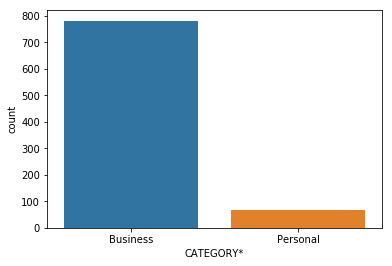

In [6]:
# bar plot of the 'CATEGORY*' column
print(df['CATEGORY*'].value_counts())
sns.countplot(x='CATEGORY*', data=df)

Meeting            485
Meal/Entertain     139
Errand/Supplies     92
Customer Visit      86
Temporary Site      25
Between Offices     17
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64


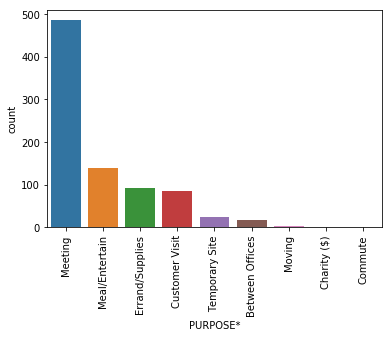

In [7]:
# bar plot of the 'PURPOSE*' column
print(df['PURPOSE*'].value_counts())
sns.countplot(x='PURPOSE*', data=df, order=df['PURPOSE*'].value_counts().index)
plt.xticks(rotation=90);

4    152
1    122
0    121
6    118
5    117
2    113
3    107
Name: Weekday, dtype: int64


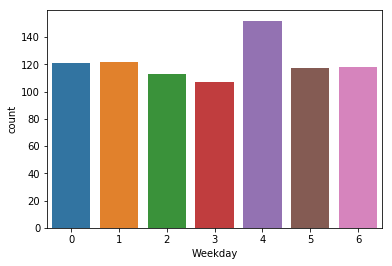

In [8]:
# count of the number of trips made on the different days of the week
print(df['Weekday'].value_counts())
sns.countplot(x='Weekday', data=df);

(0, 50)

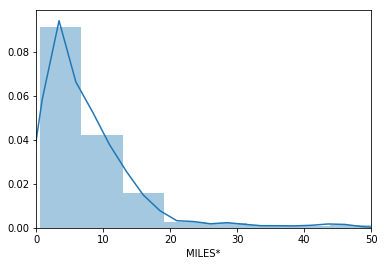

In [12]:
# histogram and kdeplot of the 'MILES*' variable
sns.distplot(df['MILES*'])
plt.xlim(0, 50)

(0, 50)

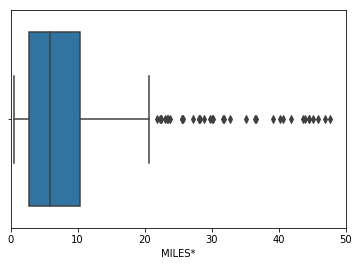

In [11]:
# boxplot to look for outliers
sns.boxplot(df['MILES*'])
plt.xlim(0, 50)

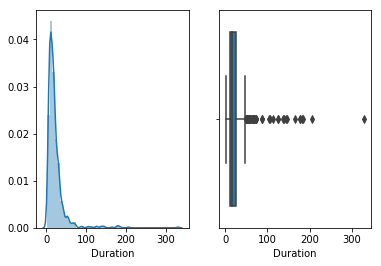

In [13]:
# histogram and kdeplot of the 'Duration' variable
plt.subplot(1, 2, 1)
sns.distplot(df['Duration'])
#plt.xlim(0, 50)

# boxplot to look for outliers
plt.subplot(1, 2, 2)
sns.boxplot(df['Duration'])
#plt.xlim(0, 50)


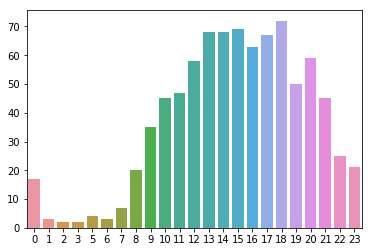

In [14]:
# count of the number of trips made on the different hours of the day
start_hour = pd.to_datetime(df['Start Time']).dt.hour.value_counts()

sns.barplot(x=start_hour.index, y=list(start_hour))

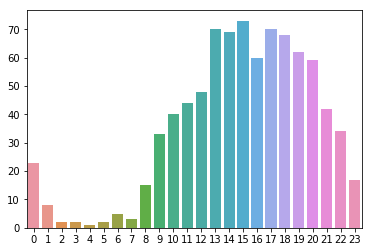

In [15]:
end_hour = pd.to_datetime(df['End Time']).dt.hour.value_counts()

sns.barplot(x=end_hour.index, y=list(end_hour))

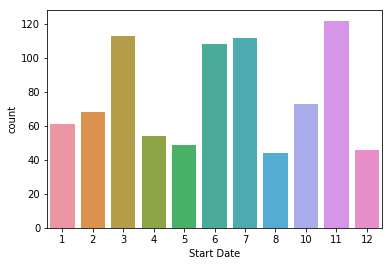

In [16]:
# count of the number of trips made on the different months of the year
sns.countplot(pd.to_datetime(df['Start Date']).dt.month)

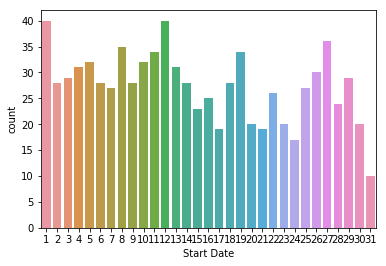

In [17]:
# count of the number of trips made on the different days of the month
sns.countplot(pd.to_datetime(df['Start Date']).dt.day)

In [18]:
# most frequent start locations
df['START*'].value_counts().nlargest(10)

Cary              201
Morrisville        85
Whitebridge        68
Durham             37
Raleigh            28
Apex               17
Westpark Place     17
Berkeley           16
Midtown            14
Kissimmee          11
Name: START*, dtype: int64

In [19]:
# most frequent end locations
df['STOP*'].value_counts().nlargest(10)

Cary              203
Morrisville        84
Whitebridge        65
Durham             36
Raleigh            29
Apex               17
Westpark Place     16
Berkeley           16
Kissimmee          12
Midtown            11
Name: STOP*, dtype: int64

In [20]:
# dataframe of most frequent locations
most_frequent_stops = df['STOP*'].value_counts().nlargest(10).index

df_filtered = df[df['STOP*'].isin(most_frequent_stops)]

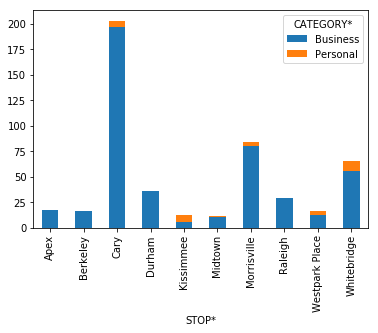

In [21]:
# stacked bar chart 
pd.crosstab(df_filtered['STOP*'], df_filtered['CATEGORY*']).plot.bar(stacked=True)

In [22]:
# dataframe of trips in different areas
df_diff_area = df[df['START*']!=df['STOP*']]

df_diff_area.describe()

,MILES*,Weekday,Duration
count,732.000000,732.000000,732.000000
mean,11.411885,3.025956,22.348361
std,23.972887,1.999489,25.531188
min,0.500000,0.000000,2.000000
25%,3.000000,1.000000,10.000000
50%,6.250000,3.000000,17.000000
75%,10.500000,5.000000,25.000000
max,310.300000,6.000000,330.000000


In [23]:
# dataframe of trips in same areas
df_same_area = df[df['START*']==df['STOP*']]

df_same_area.describe()

,MILES*,Weekday,Duration
count,118.000000,118.000000,118.000000
mean,4.683051,3.008475,14.805085
std,5.028471,1.958963,11.862646
min,0.500000,0.000000,1.000000
25%,1.800000,1.000000,7.250000
50%,3.400000,3.000000,12.000000
75%,5.500000,5.000000,16.000000
max,39.200000,6.000000,65.000000


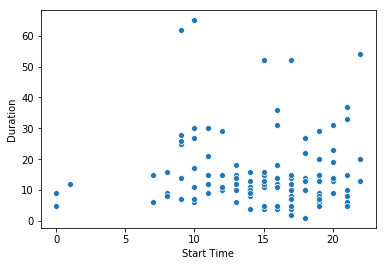

In [24]:
# for trips in same area
sns.scatterplot(x=pd.to_datetime(df_same_area['Start Time']).dt.hour, y=df_same_area['Duration'])

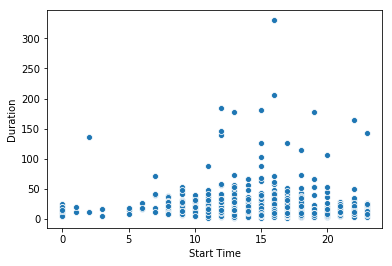

In [25]:
# for trips in different areas
sns.scatterplot(x=pd.to_datetime(df_diff_area['Start Time']).dt.hour, y=df_diff_area['Duration'])

In [26]:
# dataframe for trips that take place on Fridays
df_fri = df[df['Weekday'] == 4]

In [27]:
# statistical summary
df_fri.describe()

,MILES*,Weekday,Duration
count,152.000000,152.0,152.000000
mean,14.517763,4.0,25.013158
std,34.459011,0.0,35.104949
min,0.700000,4.0,2.000000
25%,3.300000,4.0,11.000000
50%,8.450000,4.0,18.000000
75%,11.225000,4.0,24.000000
max,310.300000,4.0,330.000000


In [28]:
# finding the no. of trips in same and different areas on Fridays
print(len(df_fri[df_fri['START*'] == df_fri['STOP*']]))
print(len(df_fri[df_fri['START*'] != df_fri['STOP*']]))

14
138


count    850.000000
mean       0.410076
std        0.247251
min        0.100000
25%        0.263844
50%        0.363636
75%        0.488810
max        3.800000
Name: Speed, dtype: float64


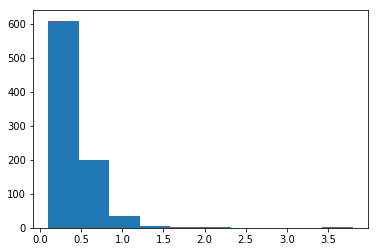

In [29]:
# creating the 'Speed' column
df['Speed'] = df['MILES*']/df['Duration']

# statistical summary
print(df['Speed'].describe())

# histogram
plt.hist(df['Speed']);

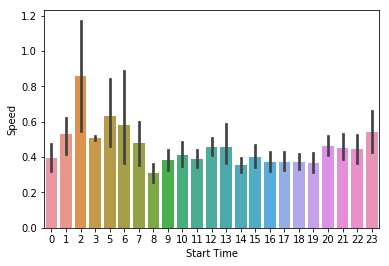

In [30]:
# speed during the different hours of the day
sns.barplot(x=pd.to_datetime(df['Start Time']).dt.hour, y=df['Speed'])

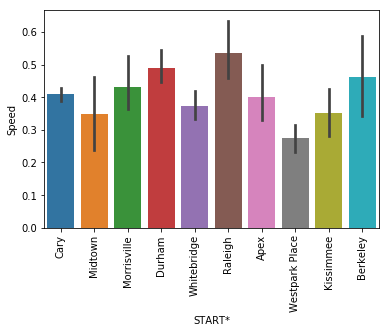

In [31]:
# speed in the different locations of the most frequent starting points
most_frequent_starts = df['START*'].value_counts().nlargest(10).index

df_filtered = df[df['START*'].isin(most_frequent_starts)]

sns.barplot(x='START*', y='Speed', data=df_filtered)
plt.xticks(rotation=90);

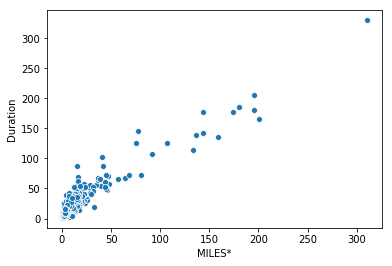

In [32]:
sns.scatterplot(data=df, x='MILES*', y='Duration')

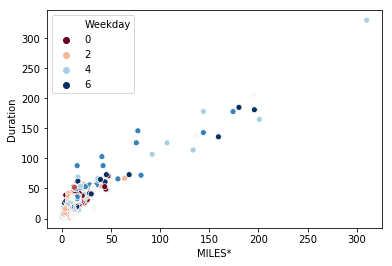

In [33]:
sns.scatterplot(data=df, x='MILES*', y='Duration', hue='Weekday', palette="RdBu")

(0, 100)

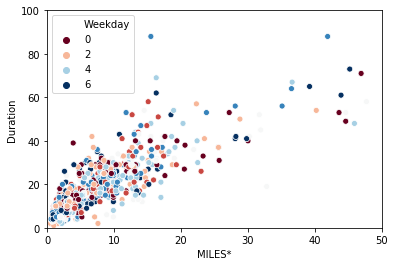

In [34]:
sns.scatterplot(data=df, x='MILES*', y='Duration', hue='Weekday', palette="RdBu")
plt.xlim(0,50)
plt.ylim(0,100)

(0, 100)

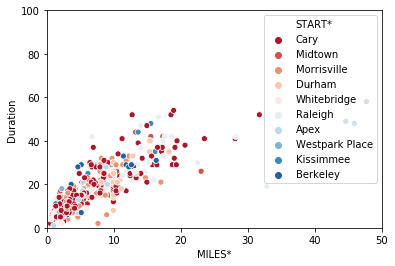

In [35]:
sns.scatterplot(data=df_filtered, x='MILES*', y='Duration', hue='START*', palette="RdBu")
plt.xlim(0, 50)
plt.ylim(0, 100)